# Mothership Dice
This notebook rolls one million of each type of die used in the Mothership RPG individually and with advantage and disadvantage. It then provides summary statistics and visualizations of the distribution of rolls.

In [43]:
import random
import pandas as pd
import matplotlib.pyplot as plt

def roll_die(sides):
    if sides == 100:
        return random.randint(0, 99)
    else:
        return random.randint(1, sides)

def roll_dice(row, num_die, sides):
    total = 0

    for die in range(num_die):
        total += roll_die(sides)
    
    return total

def roll_dice_advantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return max(roll_one, roll_two)

def roll_dice_disadvantage(row, num_die, sides):
    roll_one = roll_dice(row, num_die, sides)
    roll_two = roll_dice(row, num_die, sides)

    return min(roll_one, roll_two)

df = pd.DataFrame(index=range(1000000))

In [44]:
#d100
df['ignore'] = 0

df['1d100'] = df.apply(roll_dice, num_die=1, sides=100, axis='columns')
df['1d100[+]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=100, axis='columns')
df['1d100[-]'] = df.apply(roll_dice_advantage, num_die=1, sides=100, axis='columns')

df.drop('ignore', axis=1, inplace=True)

In [45]:
#d5
df['1d5'] = df.apply(roll_dice, num_die=1, sides=5, axis='columns')
df['1d5[+]'] = df.apply(roll_dice_advantage, num_die=1, sides=5, axis='columns')
df['1d5[-]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=5, axis='columns')

In [46]:
#d10
total_dice = 4

for die in range(1, total_dice+1):
    df[f"{die}d10"] = df.apply(roll_dice, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[+]"] = df.apply(roll_dice_advantage, num_die=die, sides=10, axis='columns')
    df[f"{die}d10[-]"] = df.apply(roll_dice_disadvantage, num_die=die, sides=10, axis='columns')

In [47]:
#d20
df['d20'] = df.apply(roll_dice, num_die=1, sides=20, axis='columns')
df['d20[+]'] = df.apply(roll_dice_advantage, num_die=1, sides=20, axis='columns')
df['d20[-]'] = df.apply(roll_dice_disadvantage, num_die=1, sides=20, axis='columns')

### Descriptive Statistics
The most important statistics too look at here are median and the 50% row. The 50% row is the median, so high and low rolls do not through off this average as much. The median is closer to the "average" roll that you would see in reality compared to the mean.

In [48]:
df.describe()

,1d100,1d100[+],1d100[-],1d5,1d5[+],1d5[-],1d10,1d10[+],1d10[-],2d10,...,2d10[-],3d10,3d10[+],3d10[-],4d10,4d10[+],4d10[-],d20,d20[+],d20[-]
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,49.466569,32.847097,66.188091,3.001574,3.799378,2.200170,5.503635,7.156203,3.850255,11.000130,...,8.680946,16.501598,19.326805,13.675805,22.006976,25.263782,18.743963,10.495948,13.814264,7.178574
std,28.894784,23.580929,23.563952,1.414073,1.165630,1.166481,2.870819,2.349202,2.350830,4.067299,...,3.338226,4.973107,4.095571,4.091592,5.752967,4.727578,4.729343,5.764889,4.718003,4.715198
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,3.000000,4.000000,3.000000,4.000000,6.000000,4.000000,1.000000,1.000000,1.000000
25%,24.000000,13.000000,50.000000,2.000000,3.000000,1.000000,3.000000,6.000000,2.000000,8.000000,...,6.000000,13.000000,17.000000,11.000000,18.000000,22.000000,15.000000,5.000000,10.000000,3.000000
50%,49.000000,29.000000,70.000000,3.000000,4.000000,2.000000,6.000000,8.000000,3.000000,11.000000,...,9.000000,17.000000,19.000000,14.000000,22.000000,25.000000,19.000000,10.000000,15.000000,6.000000
75%,75.000000,50.000000,86.000000,4.000000,5.000000,3.000000,8.000000,9.000000,5.000000,14.000000,...,11.000000,20.000000,22.000000,17.000000,26.000000,29.000000,22.000000,15.000000,18.000000,11.000000
max,99.000000,99.000000,99.000000,5.000000,5.000000,5.000000,10.000000,10.000000,10.000000,20.000000,...,20.000000,30.000000,30.000000,29.000000,40.000000,40.000000,39.000000,20.000000,20.000000,20.000000


### Box Plot
This box plot visualizes the above table. It shows the range of values that you encounter. The line in the middle of the box is the median. The box represents the range of the 25%-75% percentile, which accounts for the vast majority of your dice rolls. The whiskers on either side represent the minimum and maximum values, bar any outliers, which are represented by the circles.

<AxesSubplot:>

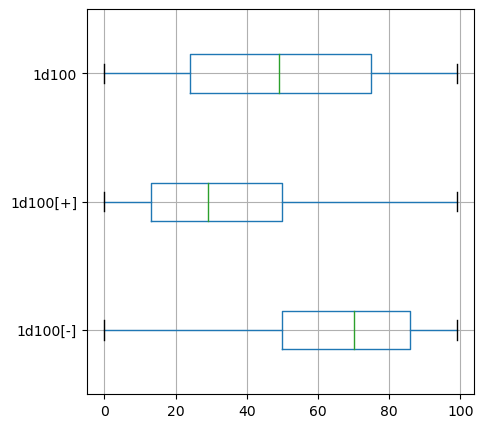

In [49]:
#d100
df.boxplot(column=['1d100[-]', '1d100[+]', '1d100'],figsize=(5, 5), vert=False)

<AxesSubplot:>

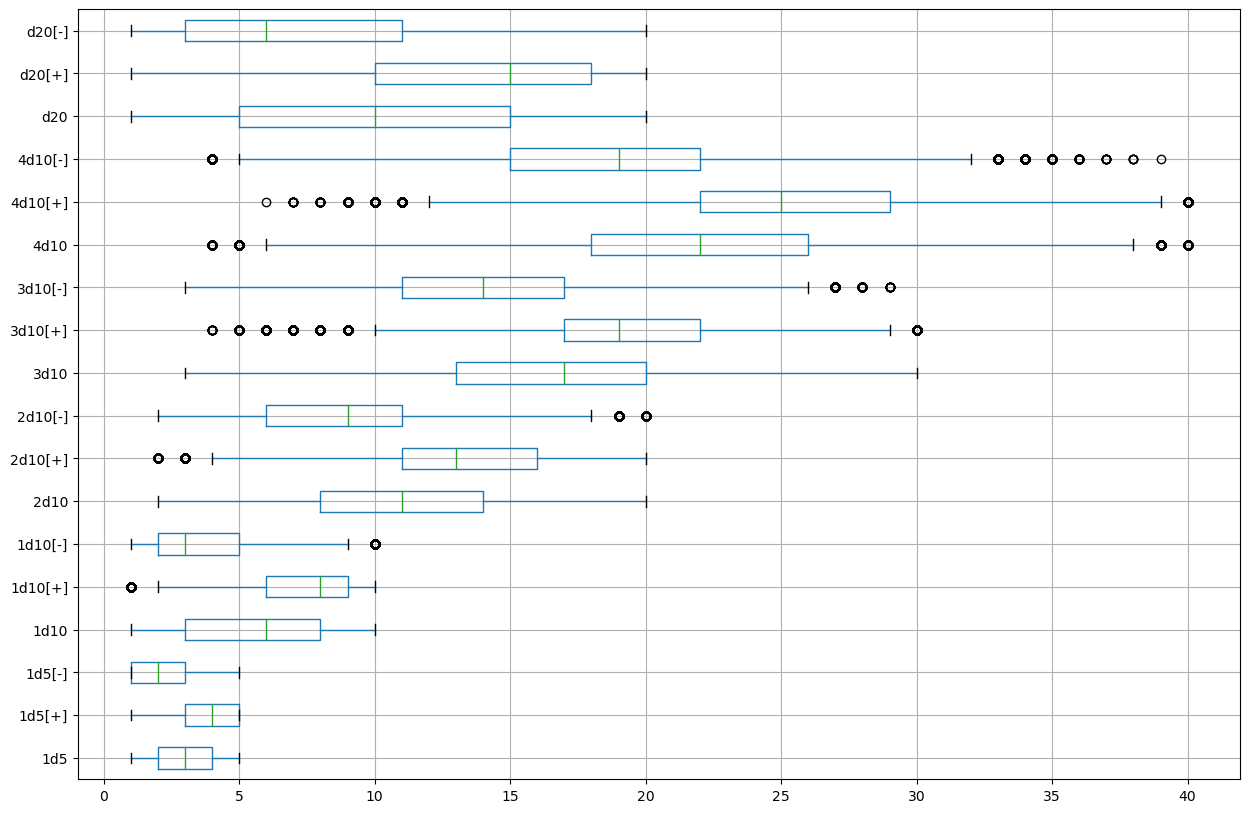

In [50]:
#d5, d10, d20
columns = df.columns.values.tolist()
columns.remove('1d100')
columns.remove('1d100[+]')
columns.remove('1d100[-]')
df.boxplot(column=columns, figsize=(15, 10), vert=False)

### Histogram
This histogram shows the distribution of roll values.

array([[<AxesSubplot:title={'center':'1d100'}>,
        <AxesSubplot:title={'center':'1d100[+]'}>,
        <AxesSubplot:title={'center':'1d100[-]'}>,
        <AxesSubplot:title={'center':'1d5'}>,
        <AxesSubplot:title={'center':'1d5[+]'}>],
       [<AxesSubplot:title={'center':'1d5[-]'}>,
        <AxesSubplot:title={'center':'1d10'}>,
        <AxesSubplot:title={'center':'1d10[+]'}>,
        <AxesSubplot:title={'center':'1d10[-]'}>,
        <AxesSubplot:title={'center':'2d10'}>],
       [<AxesSubplot:title={'center':'2d10[+]'}>,
        <AxesSubplot:title={'center':'2d10[-]'}>,
        <AxesSubplot:title={'center':'3d10'}>,
        <AxesSubplot:title={'center':'3d10[+]'}>,
        <AxesSubplot:title={'center':'3d10[-]'}>],
       [<AxesSubplot:title={'center':'4d10'}>,
        <AxesSubplot:title={'center':'4d10[+]'}>,
        <AxesSubplot:title={'center':'4d10[-]'}>,
        <AxesSubplot:title={'center':'d20'}>,
        <AxesSubplot:title={'center':'d20[+]'}>],
       [<AxesSubplo

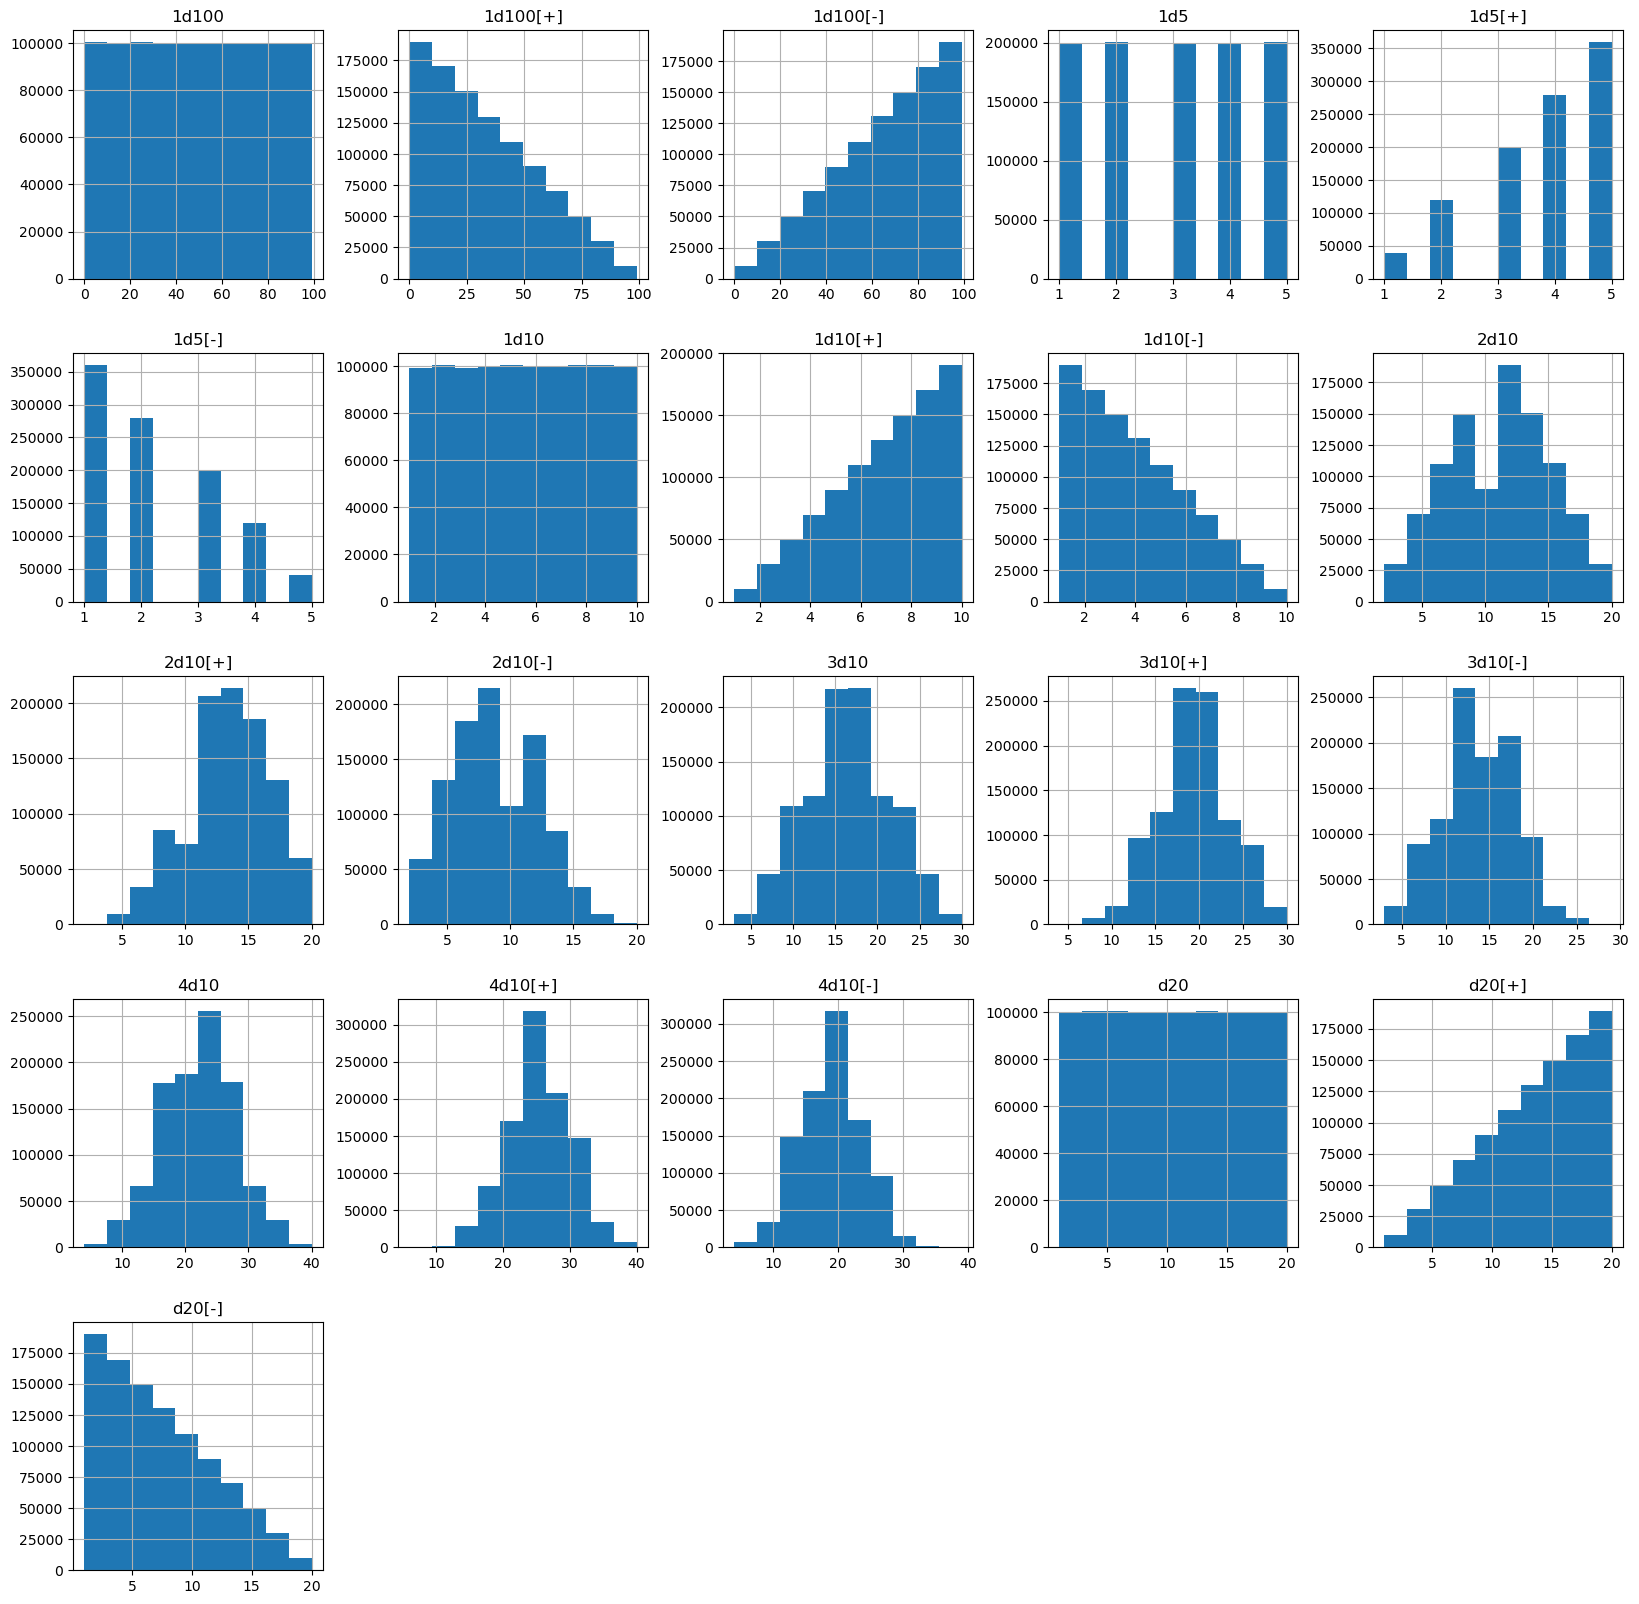

In [51]:
df.hist(figsize=(20, 20))

### Density plot
This chart shows the density of the distribution of the dice rolls. This allows you to compare the shapes of the curves compared to the normal distribution (bell curve) to see whether the rolls skew negative (higher values) or skew positive (lower values). In statistics, skew refers to the tail of the curve, not the portion with the most values.

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

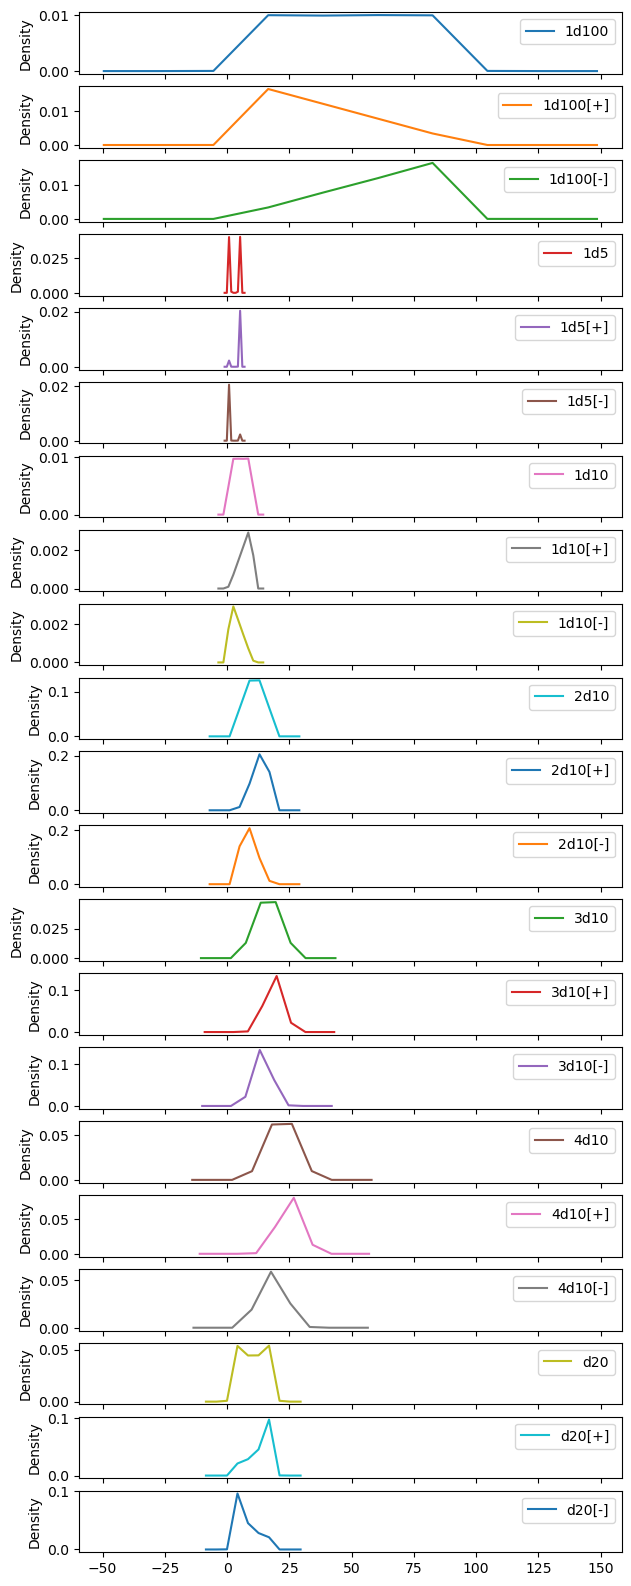

In [52]:
df.plot.density(figsize=(7, 20), ind=10, subplots=True)